In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [109]:
def adresult(data):
    res = adfuller(data)
    print('Estatistica de teste:', res[0])
    print('P-valor:', res[1])
    if res[1]<0.05:
        print('Estacionária')
    else:
        print('Não estacionária')

In [110]:
df = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)
data = df.copy()
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


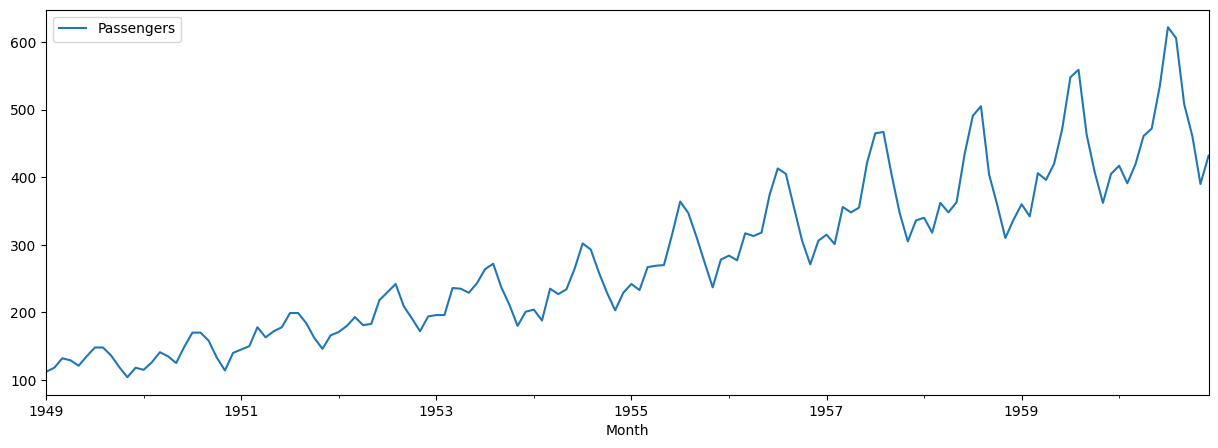

In [111]:
df[['Passengers']].plot(figsize=(15,5));

In [112]:
adresult(data['Passengers'])

Estatistica de teste: 0.8153688792060441
P-valor: 0.9918802434376409
Não estacionária


In [113]:
diff_1 = data['Passengers'].diff(periods=1)
diff_1 = diff_1.dropna()
adresult(diff_1)

Estatistica de teste: -2.8292668241700034
P-valor: 0.05421329028382497
Não estacionária


In [114]:
diff_2 = data['Passengers'].diff(periods=2)
diff_2 = diff_2.dropna()
adresult(diff_2)

Estatistica de teste: -2.9616951355554235
P-valor: 0.03862975767698849
Estacionária


In [115]:
data = data.sort_values('Month')
proporcao_treinamento = 0.8
indice_divisao = int(proporcao_treinamento * len(data))

treino = data[:indice_divisao]
teste = data[indice_divisao:]

print('Dados de treinamento:', len(treino))
print('Dados de teste:', len(teste))


Dados de treinamento: 115
Dados de teste: 29


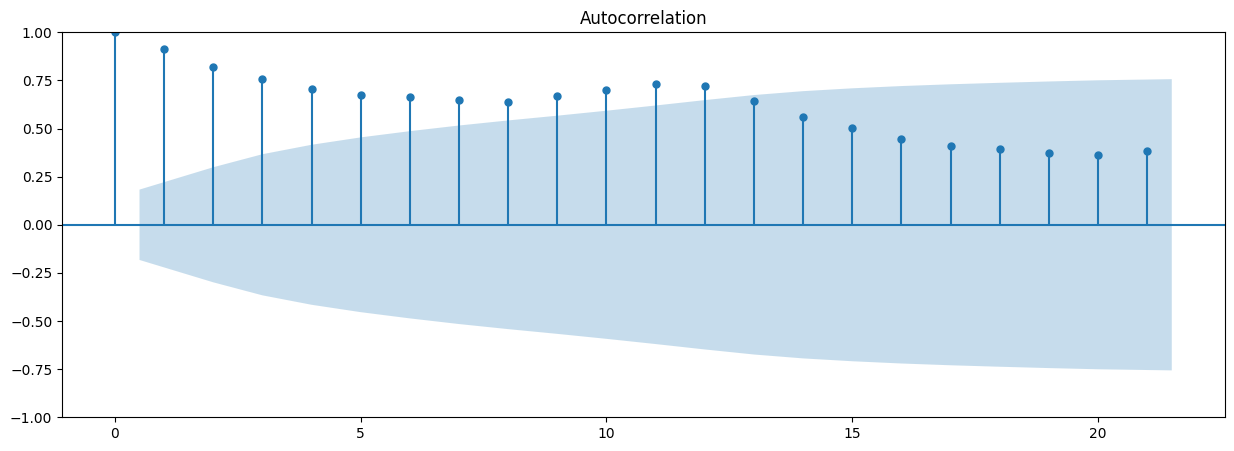

In [116]:
fig, ax = plt.subplots(figsize = (15,5))
plot_acf(treino['Passengers'], ax=ax);

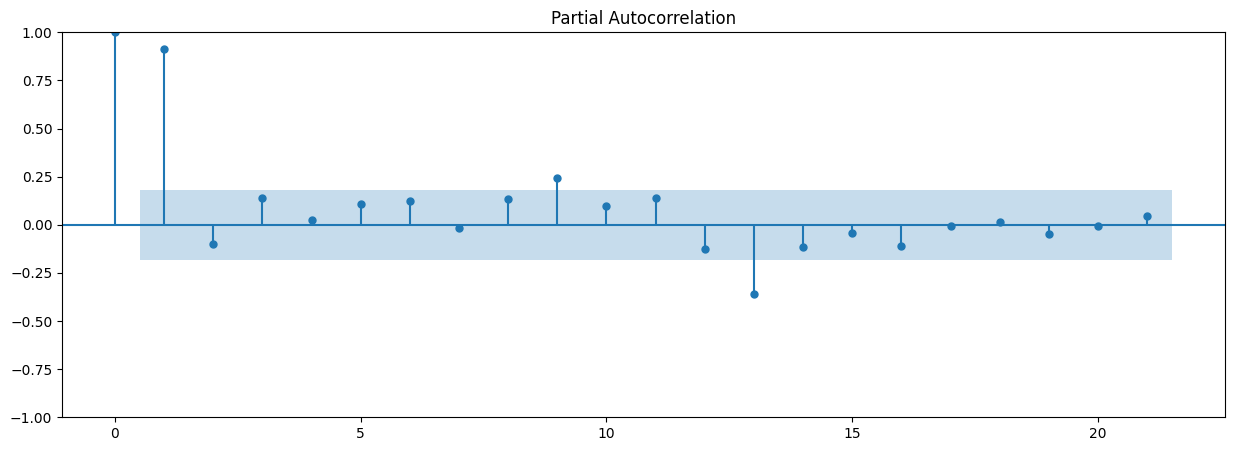

In [117]:
fig, ax = plt.subplots(figsize = (15,5))
plot_pacf(treino['Passengers'], ax=ax);

c:\Users\Miguel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Miguel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Miguel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


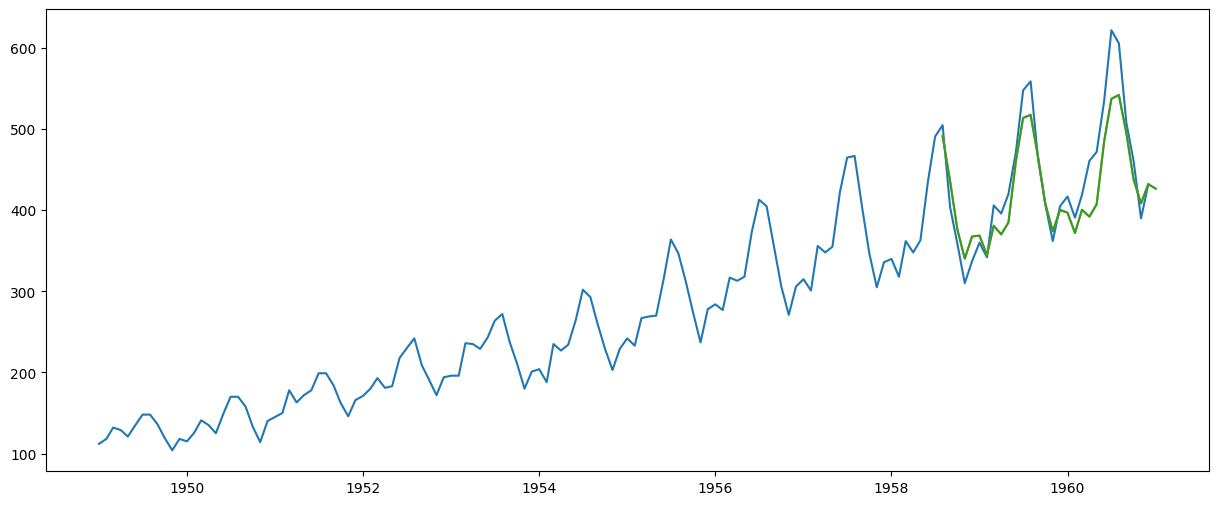

In [122]:
treino = pd.DataFrame(treino['Passengers'], index=pd.DatetimeIndex(treino.index, freq='MS'))
modelo = sm.tsa.ARIMA(treino['Passengers'], order=(13,2, 2))
resultado = modelo.fit()
previsao = resultado.predict(start=len(treino), end=len(treino)+len(teste))  
fig = plt.figure(figsize=(15, 6))
plt.plot(data.index, data['Passengers'], label='Dados completos')
plt.plot(previsao.index, previsao, label='Previsões')
plt.plot(previsao.index, previsao, label='Previsões')